# **Data3406 - week11**

> Authur: Ran Sun

### **Notebook for further data cleanings and explorations.**



---



> *Importing libraries required for data cleanings and explorations below.*

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
p1 = pd.read_csv('/content/drive/MyDrive/Modifydata/Participant-01.csv')
p1

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.000000
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.000000
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.000000
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.000000
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.000000
...,...,...,...
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153.415065


In [37]:
p1.drop(index=p1.index[0], axis=0, inplace=True)
p1.head()

,Start,Finish,Steps (count)
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
5,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0


In [38]:
# Get date representation

p1_clean = p1
p1_clean["Start"] = pd.to_datetime(p1_clean["Start"])
p1_clean["Finish"] = pd.to_datetime(p1_clean["Finish"])
p1_clean.head(20)

,Start,Finish,Steps (count)
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000000
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000000
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000000
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000000
5,2022-01-01 04:00:00,2022-01-01 05:00:00,0.000000
6,2022-01-01 05:00:00,2022-01-01 06:00:00,0.000000
7,2022-01-01 06:00:00,2022-01-01 07:00:00,0.000000
8,2022-01-01 07:00:00,2022-01-01 08:00:00,0.000000
9,2022-01-01 08:00:00,2022-01-01 09:00:00,151.000000
10,2022-01-01 09:00:00,2022-01-01 10:00:00,233.000000




>  *Change steps into integer*



In [39]:
p1_clean.rename({'Steps (count)': 'Step Count'}, axis=1, inplace=True)
p1_clean["Step Count"] = p1_clean["Step Count"].astype(int)
p1_clean.head(10)

,Start,Finish,Step Count
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0
5,2022-01-01 04:00:00,2022-01-01 05:00:00,0
6,2022-01-01 05:00:00,2022-01-01 06:00:00,0
7,2022-01-01 06:00:00,2022-01-01 07:00:00,0
8,2022-01-01 07:00:00,2022-01-01 08:00:00,0
9,2022-01-01 08:00:00,2022-01-01 09:00:00,151
10,2022-01-01 09:00:00,2022-01-01 10:00:00,233




> *Aggregate by days*



In [40]:
# Aggregate by week
p1_clean.index=p1_clean["Start"] # set index as start
p1_clean.resample('D').sum() # resample into days

,Step Count
Start,
2022-01-01,11606
2022-01-02,10333
2022-01-03,6310
2022-01-04,14390
2022-01-05,11021
...,...
2022-08-29,8330
2022-08-30,8833
2022-08-31,14868


> *Then aggregate by week*

In [41]:
p1_clean["Date"]=p1_clean.index
p1_clean['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
p1_clean['Date'] = pd.to_datetime(p1_clean['Date'], format='%Y%m%d')# convert it into normalized forms.
p2_clean=p1_clean.resample('W-Mon', on='Date').sum() # resample into weeks

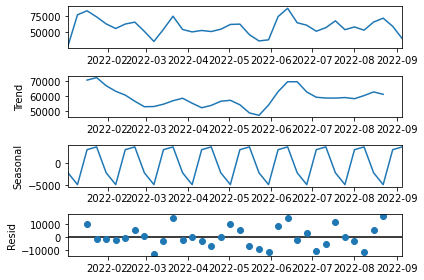

In [44]:
p2_clean['date']=p2_clean.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(p2_clean.drop(columns=['date']), model = 'additive',period=4)
fig = decomposition.plot()

(array([738156., 738187., 738215., 738246., 738276., 738307., 738337.,
        738368., 738399.]), <a list of 9 Text major ticklabel objects>)

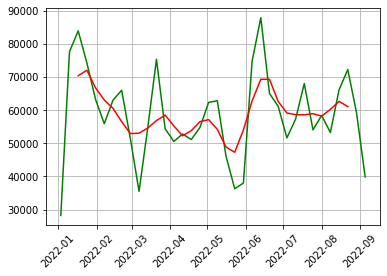

In [46]:
# plot trend on matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(p2_clean.index, p2_clean['Step Count'], c='green')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.xticks(rotation=45)

(array([738156., 738187., 738215., 738246., 738276., 738307., 738337.,
        738368., 738399.]), <a list of 9 Text major ticklabel objects>)

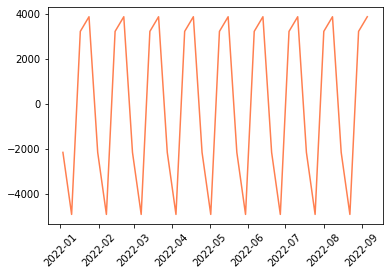

In [47]:
# plot seasonality on matplotlib
plt.plot(decomposition.seasonal.index, decomposition.seasonal, c='coral')
plt.xticks(rotation=45)

#### **Visualization conclusions**

> `Trends`

*   From trend graph above, we could only see really no clear trend is shown for this participant, this is expected as daily step count can vary greatly acroos each day.


> `Seasonality `

*  From seasonal graph , we could see there is a weekly step amplitude within 4000 to -4000.